<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_9_REDUCTION_DE_LA_DIMENSION_D%E2%80%99UN_ENSEMBLE_DE_DONNEES_PAR_L%E2%80%99ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 9 : REDUCTION DE LA DIMENSION D’UN ENSEMBLE DE DONNEES PAR L’ANALYSE EN COMPOSANTES PRINCIPALES  

En tant que Data Scientist / Data Analyst, vous serez amenés à travailler avec de grands
ensembles de données possédant des centaines, milliers voir des millions de variables. Ce genre
de données, se retrouvent facilement dans tous les domaines comme la Santé, l'Ingénierie, la
Finance, le Web, etc. Les ensembles de données à grande dimension posent de nombreux défis dont :  
* Le problème de stockage et des ressources de calcul très coûteux en termes d'analyse ;  
* Le problème de surapprentissage dans des tâches de modélisation ;  
* Le fait que certains algorithmes, très utilisés en Machine Learning, ne peuvent pas traiter ce genre de données ;
* etc...  

Alors, que faire pour traiter et analyser les ensembles de données de grande dimension ? On fait appel aux techniques de réduction de dimensionnalité.  

Le but de la réduction de la dimensionnalité est de réduire les dimensions des ensembles de
données pour surmonter les défis cités ci-dessus posés par les données de grande dimension. Il
existe plusieurs techniques de réduction de dimensionnalité parmi lesquelles la plus populaire est l'Analyse en Composantes Principales (ACP). A travers ce projet, vous apprendrez ce qu'est l'ACP et comment l'utiliser dans Python pour réduire la dimensionnalité d'un ensemble de données.

## ACP : Définition  

L'idée générale derrière l'ACP est la décorrélation des variables. En effet l'ACP transforme les variables d'un jeu de données en un nouvel ensemble de variables appelées composantes
principales. Chacune de ces composants représente (explique) un certain pourcentage de la variabilité totale des données le long d'un axe orthogonal les uns aux autres. Le premier axe (donc la première composante principale) est la direction dans laquelle les données varient le plus.  

La réduction de dimensionnalité avec la technique d'ACP se fait suivant le principe selon lequel les composantes principales avec une faible variance constituent le 'bruit' (c'est ce bruit qui est l'une des causes majeures de surapprentissage des algorithmes de Machine Learning) et les composantes principales avec une forte variance constituent l'information contenue dans les données. Donc on retient les premières composantes qui expliquent la majorité de la variance (90% par exemple) totale des données.  

L'ACP peut être utilisée avant la construction d’un modèle d’apprentissage supervisé pour améliorer les performances et la généralisation de ce modèle. Il peut également être utile pour
un apprentissage non supervisé. Par exemple, on peut combiner l'ACP avec une technique de clustering pour segmenter efficacement la clientèle d'une entreprise.

**LIBRAIRIES**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

On dispose d'un jeu de données de mesures (largeur et longueur) sur les grains de maïs.

In [2]:
# Importation des données
grains_df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/seeds-width-vs-length.csv?token=GHSAT0AAAAAAC4VKTEQHHN5YGT7PUBAZWMYZ4IY7JQ',
                        header=None, names=['largeur', 'longueur'])
print(grains_df.info())
print('\n')

grains_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   largeur   210 non-null    float64
 1   longueur  210 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB
None




,largeur,longueur
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


* Calculons le coefficient de corrélation de Pearson des deux variables :

Le coefficient de corréllation entre la largeur et la longueur des grains est égal à  0.8604149377143469 pour une p_valeurégale à  8.121332906192781e-63


La figure cidessousmontre bien cette forte corrélation entre les variables :


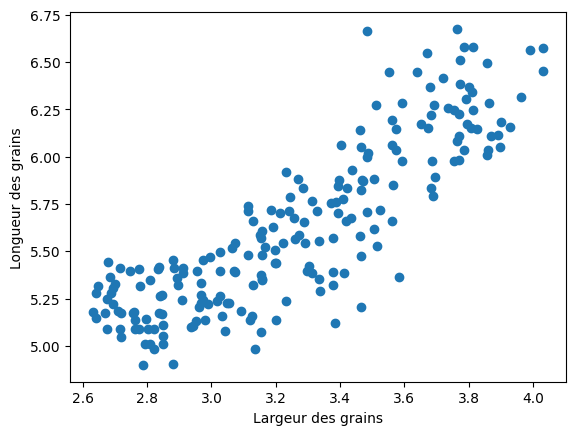

In [3]:
# Création d'un tableau numpy 2D à partir de grains_df
grains_array = grains_df.values
l = grains_array[:, 0]
L = grains_array[:, 1]

# Coefficient de corrélation entre la largeur et la longueur des grains
coef_cor, pvalue = pearsonr(l, L)

print("Le coefficient de corréllation entre la largeur et la longueur des grains est égal à ",
      coef_cor, "pour une p_valeurégale à ", pvalue)

print('\n')

print('La figure cidessousmontre bien cette forte corrélation entre les variables :')

# Visualisation du nuage de points
plt.scatter(l, L)
plt.xlabel('Largeur des grains')
plt.ylabel('Longueur des grains')
plt.show()

Il existe une forte corrélation positive et statistiquement significative entre la largeur et la
longueur des grains. Appliquons donc la technique de l'ACP pour décorréler ces variables.

In [4]:
# Création d'une instance de la classe PCA
model_acp = PCA()

# Application du modèle aux données (Entrainement du modèle par les données et transformation des données par le modèle)
grains_acp = model_acp.fit_transform(grains_array)
print(type(grains_acp))

<class 'numpy.ndarray'>


L'argument **n_components** de la fonction **PCA()** est par défaut égal au nombre de variables de l'ensemble des données. Le résultat de l'application de l'ACP sur les données est un tableau
numpy 2D composée de 02 composantes principales. Visualisons ce résultat :

Le coefficient de corréllation entre les 02 composantesprincipales est égal à  2.282906936407203e-14 et le p-value: 0.9999999999997383


La figure cidessousmontre bien cette très faible corrélation entre les composantes principales :


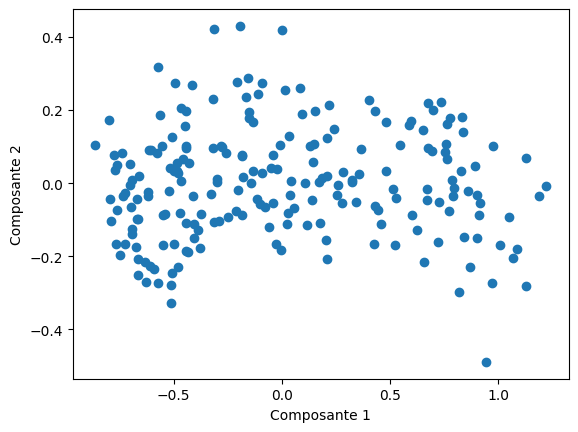

In [6]:
# Première composante principale
comp1 = grains_acp[:, 0]

# Deuxième composante principale
comp2 = grains_acp[:, 1]

# Calcul du coefficient de corrélation entre comp1 et comp2
cor_comp, pvalue_comp = pearsonr(comp1, comp2)

print("Le coefficient de corréllation entre les 02 composantesprincipales est égal à ", cor_comp, "et le p-value:", pvalue_comp)
print('\n')
print('La figure cidessousmontre bien cette très faible corrélation entre les composantes principales :')

# Nuage de points entre comp1 et comp2
plt.scatter(comp1, comp2)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()

Il n'y a pas de corrélation linéaire entre les deux composantes principales. L'ACP transforme les variables corrélées d'un jeu de données en un nouvel ensemble de variables non corrélées.  

Quelle est la variance expliquée par chacune des 02 composantes principales ?

In [7]:
# Attribut du modèle PCA pour retrouver la quantité de variance expliquée par chaque composante
model_acp.explained_variance_

array([0.31595462, 0.02301882])

In [8]:
# Attribut du modèle PCA pour retrouver le pourcentage de variance expliquée par chaque composante
model_acp.explained_variance_ratio_

array([0.93209254, 0.06790746])

In [9]:
# Pour voir le pourcentage de variance qu'on peu expliquer enutilisant un certain nombre de composantes :
model_acp.explained_variance_ratio_.cumsum()

array([0.93209254, 1.        ])

In [10]:
# Attribut du modèle PCA pour retrouver le nombre de composantes principales
model_acp.n_components_

2

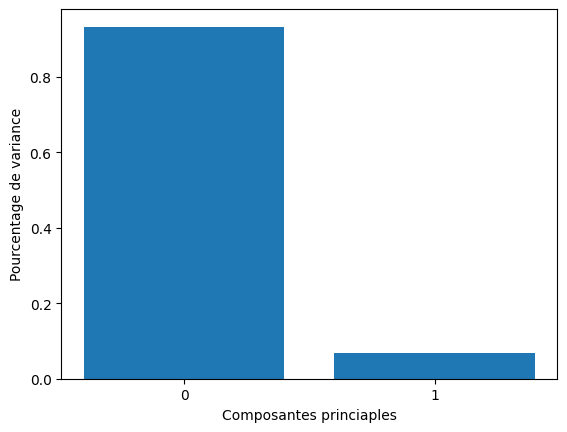

In [11]:
# Visualisation du pourcentage de variance expliquée par chaque composante

plt.bar(range(model_acp.n_components_), model_acp.explained_variance_ratio_) # Ici range(model_acp.n_components_ est égale à range(2)
plt.xlabel('Composantes princiaples')
plt.ylabel('Pourcentage de variance')
plt.xticks(range(model_acp.n_components_))
plt.show()

La première composante principale explique un peu plus de 93% de la variance des données tandis que la deuxième composante est plutôt anecdotique (moins de 7% de la variance totale).  
On peut donc dire que la **dimension intrinsèque** de ce jeu de données est 1.

In [12]:
#Attribut pour retrouver la moyenne de chaque variable originelle
model_acp.mean_

array([3.25860476, 5.62853333])

Les deux valeurs de ce tableau numpy 1D représentent respectivement l'abscisse et l'ordonnée
du repère orthogonal formé par les 02 axes principaux.

In [13]:
# Vérification de la moyenne de chaque variable originelle
grains_df.mean(axis=0)

,0
largeur,3.258605
longueur,5.628533


In [14]:
# Attribut pour retrouver les composants principaux au niveau de chaque axe
model_acp.components_

array([[ 0.63910027,  0.76912343],
       [ 0.76912343, -0.63910027]])

Le tableau Numpy 2D résultant de l'attribut components_ d'un modèle d'ACP nous indique dans quelle mesure le vecteur de chaque composante principale est affectée par chaque variable
originelle.  

Pour cet exercice, on a :  
* Composante principale 1 = 0.63910027 largeur + 0.76912343 longueur  
* Composante principale 2 = -0.76912343 largeur + 0.63910027 longueur  

Cela peut aider à l'interprétation des composantes principales.


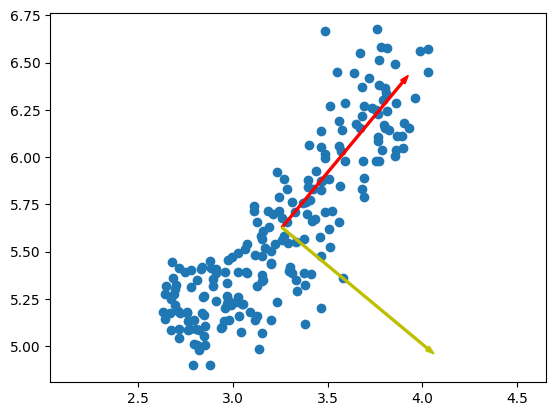

In [15]:
# Nuage de points des données originelles
plt.scatter(l, L)

# Moyenne de chaque composante
mean = model_acp.mean_

# Tracé du premier axe sous forme de flèche
axe1 = model_acp.components_[0, :]
plt.arrow(mean[0], mean[1], axe1[0], axe1[1], color='red', width=0.01)

# Tracé du deuxième axe sous forme de flèche
axe2 = model_acp.components_[1, :]
plt.arrow(mean[0], mean[1], axe2[0], axe2[1], color='y', width=0.01)

# Mettre les axes dans la même échelle
plt.axis('equal')
plt.show()

Nous pouvons décrire chaque point de l'ensemble des données comme une combinaison linéaire de ces deux vecteurs pondérés par un poids. En effet, un point peut être repéré dans le repère
(Largeur, Longueur) comme dans le repère formé par les deux axes principaux (axe1 en rouge, axe2 en jaune).  

Le graphique nous montre clairement que les points varient majoritairement suivant le premier axe principal (en rouge). La dimension intrinsèque de nos données est donc bel et bien 1.

## ACP DANS UN PIPELINE  

L'ensemble des données de cette section est un tableau d'échantillons donnant des mesures (le poids en grammes, la longueur en centimètres, le rapport en pourcentage de la hauteur à la longueur, etc.) de 7 espèces de poissons codées de 1 à 7. Chaque ligne représente un poisson individuel.  



In [16]:
# Importation des données
columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height%', 'Width%', 'Sex']
fishes = pd.read_csv('http://jse.amstat.org/datasets/fishcatch.dat.txt', delimiter= '\s+', header=None, names=columns)
print(fishes.info())
print('\n')
fishes.head()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 1 to 159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   158 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height%  159 non-null    float64
 6   Width%   159 non-null    float64
 7   Sex      72 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 11.2 KB
None




,Species,Weight,Length1,Length2,Length3,Height%,Width%,Sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [17]:
# Suppression des colonnes 'Species' et 'Sex'
fishes.drop(['Species', 'Sex'], axis=1, inplace=True)
print(fishes.head(3))

   Weight  Length1  Length2  Length3  Height%  Width%
1   242.0     23.2     25.4     30.0     38.4    13.4
2   290.0     24.0     26.3     31.2     40.0    13.8
3   340.0     23.9     26.5     31.1     39.8    15.1


In [18]:
# Remplacement de la valeur manquante au niveau de la variable 'Weight'
fishes['Weight'] = fishes['Weight'].fillna(fishes['Weight'].mean(axis=0))

# Vérifions les données manquantes
print('\n')
print(fishes.isna().sum())



Weight     0
Length1    0
Length2    0
Length3    0
Height%    0
Width%     0
dtype: int64


L'ensemble des données ci-dessus est de 6 dimensions (6 variables). A l'aide de la technique de l'ACP, nous réduirons sa dimension afin de trouver sa dimension intrinsèque.

In [19]:
# Création d'un tableau numpy 2D à partir de la dataframe
fishes_array = fishes.values

pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA())])

# Application de l'objet pipe aux données
pipe.fit(fishes_array)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

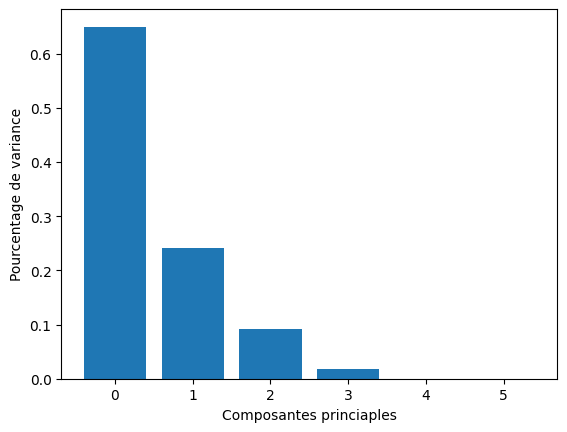

In [20]:
# Visualisation du pourcentage de variance expliquée par chaque composante
plt.bar(range(pipe[1].n_components_), pipe[1].explained_variance_ratio_) # Ici range(pipe[1].n_components_) est égale à range(6)
plt.xlabel('Composantes princiaples')
plt.ylabel('Pourcentage de variance')
plt.xticks(range(pipe[1].n_components_))
plt.show()

In [21]:
# Cumul du pourcentage de variance expliquée
pipe[1].explained_variance_ratio_.cumsum()

array([0.64945036, 0.89047222, 0.98237637, 0.99955204, 0.99995958,
       1.        ])

Les deux premières composantes expliquent 89% de la variance totale des données. On peut
donc dire que la dimension intrinsèque de cet ensemble de données est raisonnablement égale
à 2. Transformons donc la dataframe originelle de 6 variables en une dataframe de 2 variables.

In [22]:
# Création d'un pipeline
pipe2 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

# Transformation des données
fishes_transformed = pipe2.fit_transform(fishes_array)
fishes_transformed.shape

(159, 2)

Le nouveau jeu de données comporte 159 lignes et 2 colonnes. La réduction de dimensionnalité a été parfaitement opérée

### SELECTION DES COMPOSANTS PRINCIPAUX SELON LE POURCENTAGE DE VARIANCE EXPLIQUEE  

Au lieu de créer d'abord un modèle ACP avec comme nombre de composantes égal au nombre de variables puis de déterminer ensuite la dimension intrinsèque raisonnable et enfin recréer un
autre modèle ACP avec cette dimension intrinsèque pour transformer les données, on peut directement spécifier le pourcentage de la variance qu'on désire garder.  

Dans cette section, nous utiliserons le jeu de données Iris. L'ensemble de données Iris contient 3 classes de 50 instances chacune, chaque classe se référant à un type de plante d'iris. Une classe est séparable linéairement des 2 autres ; ces derniers ne sont pas linéairement séparables les uns des autres.

In [23]:
# Importation des données
import pandas as pd
iris_names = ['sepal_length', 'sepal_width', 'petal_length' ,'petal_width' ,'class']
iris = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/iris.data?token=GHSAT0AAAAAAC4VKTERADCJEKDDVUOPJVGSZ4IZ4TQ',
                   header=None, names=iris_names)
print(iris.info())
print('\n')
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None




,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


* Quel est le nombre de composantes principales qu'il faut pour expliquer 90% de la variance totale contenue dans les données d'iris ?

In [24]:
# Suppression de la colone 'class'
iris.drop(['class'], axis=1, inplace=True)
# Création d'un tableau numpy 2D à partir de la dataframe iris
iris_array = iris.values

# Création d'un pipeline
pipe_iris = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=0.9))])

# Transformation des données
pipe_iris.fit(iris_array)
# Nombre de composantes nécessaire pour expliquer 90% de la variance
n_90 = len(pipe_iris.steps[1][1].components_)

print("Le nombre de composantes principales qu'il faut pour expliquer 90% de la variance totale contenue dans les données d'iris est :", n_90)

Le nombre de composantes principales qu'il faut pour expliquer 90% de la variance totale contenue dans les données d'iris est : 2


## CONCLUSION
L’Analyse en Composantes Principales est une technique efficace pour réduire la
dimensionnalité des grands ensembles de données. Elle permet de manipuler aisément ce genre
de données.